In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("C:/Users/mlard/OneDrive/Escritorio/Mateo/Org de Datos/tp3Github/Org-Datos-Grupo-19/train_data_final.csv")

In [3]:
df_copy = df

Exploracion, preprocesamiento y transformacion de datos

a) Visualizacion de datos

In [4]:
df.shape

(276572, 192)

In [5]:
df.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,2518955,743d55408505dee752adc6e62b273f4397db6e89f19034...,2017-08-10,0.947242,0.002204,0.008002,1.007516,0.002830,0.453227,0.005992,...,NaN,NaN,0.003183,0.005264,0.007173,NaN,0.009359,0.004306,0.002719,0
1,1781039,522c85a354bfec790067b54e9db7353d20d4709ae5dc93...,2017-07-04,0.757648,0.002076,0.008751,0.814083,0.000408,0.155700,0.004156,...,NaN,NaN,1.000928,0.005655,0.891417,0.14907,1.009381,0.007953,0.095926,0
2,1488700,4488928018c20bf6261e69c8a94a47b6206a2fe91480b8...,2017-07-29,0.392041,0.005770,0.029682,0.810262,0.006672,0.180378,0.005028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3174307,9296e983c3e4f99b046952397fc4ba950abf1032a9bd6c...,2017-03-30,0.673978,0.588604,0.295201,0.024650,0.007951,0.125583,0.008760,...,NaN,NaN,0.003558,0.008268,0.000429,NaN,0.005009,0.003020,0.002798,1
4,1379981,3fa10314686e0e51d8f76235eceab91d70aa3f24a98c3e...,2018-01-17,0.778075,0.006930,0.056721,0.819369,0.004922,0.089214,0.006884,...,NaN,NaN,0.004670,0.000125,0.003151,NaN,0.008442,0.000819,0.000342,0


In [6]:
df.info(verbose=True, null_counts=True)

C:\Users\mlard\AppData\Local\Temp\ipykernel_7592\2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Data columns (total 192 columns):
 #    Column       Non-Null Count   Dtype  
---   ------       --------------   -----  
 0    Unnamed: 0   276572 non-null  int64  
 1    customer_ID  276572 non-null  object 
 2    S_2          276572 non-null  object 
 3    P_2          274277 non-null  float64
 4    D_39         276572 non-null  float64
 5    B_1          276572 non-null  float64
 6    B_2          276476 non-null  float64
 7    R_1          276572 non-null  float64
 8    S_3          225400 non-null  float64
 9    D_41         276476 non-null  float64
 10   B_3          276476 non-null  float64
 11   D_42         39357 non-null   float64
 12   D_43         193452 non-null  float64
 13   D_44         262857 non-null  float64
 14   B_4          276572 non-null  float64
 15   D_45         276476 non-null  float64
 16   B_5          276572 non-null  float64
 17   R_2          276572 non-null  float64
 18   D_

In [7]:
#Muestro las columnas de tipo object
cole = [column for column in df.columns if df[column].dtype == 'object']
cole

['customer_ID', 'S_2', 'D_63', 'D_64']

In [8]:
df.sample(10)

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
198650,2482449,72995ba8a9aed809b29c79b86c83b67d4868893bfc1d3e...,2017-04-29,0.335150,0.005425,0.023604,1.003248,0.009384,0.602965,0.143077,...,NaN,NaN,0.007661,0.009246,0.007283,NaN,0.005463,0.006681,0.000507,0
97632,5141396,edce8f9f454729cca645e6d188884d7988bbd6bdad28c4...,2017-10-06,0.814842,0.475176,0.196171,0.150567,0.001888,0.257152,0.007628,...,NaN,NaN,0.007426,0.006177,0.000326,NaN,0.000285,0.006216,0.002280,1
128810,1971572,5b03f03c26b951d066b96a745ae9c4d69b681dcd6604c2...,2017-05-20,0.234256,0.008295,0.004448,0.814035,0.001904,NaN,0.001395,...,NaN,NaN,0.003123,0.005433,0.007443,NaN,0.008505,0.006112,0.006744,0
27802,3531462,a324b2216cf5039c9e3fbe3469f6e0febdfd74f1af9c08...,2017-10-25,0.850700,0.478909,0.091123,0.188402,0.003317,0.281097,0.005856,...,NaN,NaN,0.009347,0.008145,0.005867,NaN,0.008070,0.004193,0.009096,0
77615,3549656,a3f78503dec93e1e2a621665c3522377fcf27aefda7b8a...,2017-11-29,0.716824,0.648934,0.069095,0.237028,0.008042,0.289571,0.004184,...,NaN,NaN,0.006201,0.001866,0.003143,NaN,0.003538,0.005706,0.000863,0
164149,4299463,c6bc01fc5cc51cd7ed2e02e03f0ec4b724182bf3a10721...,2017-11-01,0.978547,0.568539,0.008888,1.009416,0.007011,0.070367,0.002061,...,NaN,NaN,0.009376,0.000241,0.003509,NaN,0.005273,0.003701,0.004312,0
261646,1958181,5a60ee2f5aa274a83895bfa616d51cbe1a4303c4047932...,2018-03-30,0.840129,0.007876,0.014911,1.007606,0.009170,0.247972,0.003636,...,NaN,NaN,0.009834,0.000485,0.003385,NaN,0.003768,0.008844,0.008359,0
80976,2781093,805a96ed4ba10000b00a291affc180bea0bf2ea968eb53...,2017-07-19,0.263179,0.506360,0.224436,0.031448,0.508386,0.438056,0.004145,...,NaN,NaN,0.005897,0.002402,0.003572,NaN,0.006920,0.000519,0.001538,0
25500,3136862,90d783638c3cf065bedabe223fa3b0191148866fe2066b...,2017-11-13,0.890093,0.036138,0.184419,0.358323,0.006647,0.177796,0.001718,...,NaN,NaN,0.001334,0.008802,0.009138,NaN,0.009515,0.006639,0.008377,0
2625,3970690,b777c65b5d54427e3d4064c789497eb14b70f023a11176...,2018-02-04,0.927651,0.001034,0.036559,1.005100,0.001485,0.089312,0.000651,...,NaN,NaN,0.002366,0.003524,0.007938,NaN,0.009326,0.005122,0.004013,0


American Airlines en la descripcion de la data del dataset define:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

Por lo tanto las letras de los nombres de las columnas ya sabemos a que hacen referencia. Nos queda por deducir a que hace referencia el numero que le sigue a la letra.
(Se podria suponer que el numero hace referencia a un individuo, o a un vuelo ?)

In [9]:
#las variables categoricas que presenta American Airlines
categoricas = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [10]:
df.isnull().sum()

Unnamed: 0          0
customer_ID         0
S_2                 0
P_2              2295
D_39                0
                ...  
D_142          229717
D_143            5139
D_144            2049
D_145            5139
target              0
Length: 192, dtype: int64

In [11]:
df.groupby("customer_ID").size().sort_values(ascending = False)

customer_ID
a19c49b64f5eea11b318c4c61bcc151d93c48bf8baa782211d3d9e66577095f6    7
d29fcecb3105a8d463b8f0292a9617f4b52a9bfe6b90e2b60d9961814880280f    6
5e932111d5a199c9bbefa64ccb1ca44ea43c9440af73c9d8f43ea119e74c1ce7    6
5e08357268f0bf1066130b754f5c850a9ce83d5833b4ef9af6d6ddc5e764a27d    6
a947b96a507d35fe5b66587e12ae7a87a057d27c44d002ffb341a2e501cb9a53    6
                                                                   ..
8316c95fb178243bf9969efc2cbfe4e80ac610e0d019496c083cb85cca6153be    1
8317b681e31ff5b723e9714177602f98090084d56ddbd190867a149fecc2fa22    1
23cb2c7cfc227cb7be4009ea8df22c2909e7fab8301e861dc2df4335e0d85dac    1
8318884b9d7bb60770eae665624d2a5ce77b8a06c88ee19cb53fa4187aaf31a2    1
38a00b5320f6b4b9b721f87e5ba722f8a4f8d12f2aa3ea9ba3223e72888b1bb5    1
Length: 208766, dtype: int64

In [12]:
df.duplicated().isnull().sum()
###no tiene duplicados

0

In [13]:
df.sample(1)

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
60755,2763825,7f8bad340abc5d94482f7db1f89a37b17471d708c69ae1...,2018-01-14,0.645086,0.009651,0.023724,1.007245,0.005181,1.370044,0.001932,...,NaN,NaN,0.002274,0.001682,0.006578,NaN,0.005607,0.008905,0.00506,0


In [14]:
df.columns

Index(['Unnamed: 0', 'customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=192)

Mostramos la cantidad de columnas que tiene cada tipo de variable

In [15]:
d_feats = [c for c in df.columns if c.startswith('D_')]
s_feats = [c for c in df.columns if c.startswith('S_')]
p_feats = [c for c in df.columns if c.startswith('P_')]
b_feats = [c for c in df.columns if c.startswith('B_')]
r_feats = [c for c in df.columns if c.startswith('R_')]
print(f'Number of Delinquency variables: {len(d_feats)}')
print(f'Number of Spend variables: {len(s_feats)}')
print(f'Number of Payment variables: {len(p_feats)}')
print(f'Number of Balance variables: {len(b_feats)}')
print(f'Number of Risk variables: {len(r_feats)}')
print(f'Total variable counts: {len(d_feats)+ len(s_feats)+ len(p_feats) + len(b_feats) + len(r_feats)}')

Number of Delinquency variables: 96
Number of Spend variables: 22
Number of Payment variables: 3
Number of Balance variables: 40
Number of Risk variables: 28
Total variable counts: 189


Analizamos la columna que muestra fechas

In [16]:
df['S_2'] = pd.to_datetime(df['S_2'])

<AxesSubplot:>

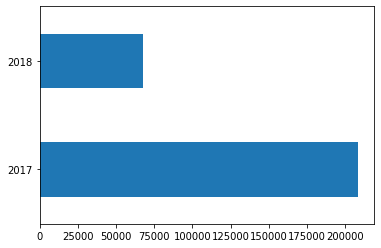

In [17]:
df.S_2.dt.year.value_counts().plot(kind = 'barh')

<AxesSubplot:>

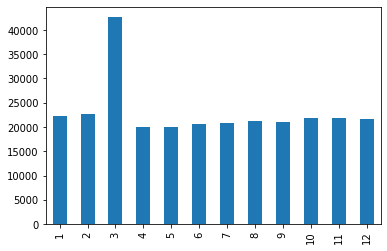

In [18]:
df.S_2.dt.month.value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:>

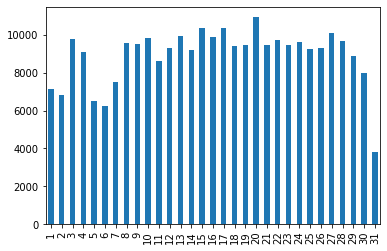

In [19]:
df.S_2.dt.day.value_counts().sort_index().plot(kind = 'bar')

Vemos cantidad de valores nulos que tiene cada columna

In [20]:
df.isnull().sum().sort_values(ascending = False)

D_87      276359
D_88      276278
D_108     275135
D_110     274970
D_111     274970
           ...  
B_24           0
D_75           0
P_4            0
B_23           0
target         0
Length: 192, dtype: int64

El porcentaje de valores nulos que tiene cada columna

In [21]:
df.isnull().sum().sort_values(ascending = False)/df.shape[0] 

D_87      0.999230
D_88      0.998937
D_108     0.994804
D_110     0.994208
D_111     0.994208
            ...   
B_24      0.000000
D_75      0.000000
P_4       0.000000
B_23      0.000000
target    0.000000
Length: 192, dtype: float64

In [22]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l


filterscolumnsname = rmissingvaluecol(df,45)

# Columns having more than 45 percent missing values:  31
Columns:
 ['D_88', 'D_111', 'D_110', 'D_77', 'R_26', 'D_49', 'B_39', 'D_53', 'D_50', 'D_82', 'D_108', 'D_132', 'D_105', 'D_56', 'D_42', 'D_76', 'D_73', 'B_42', 'D_138', 'S_9', 'B_17', 'D_134', 'D_66', 'D_106', 'D_135', 'D_87', 'D_136', 'D_137', 'D_142', 'R_9', 'B_29']


C:\Users\mlard\AppData\Local\Temp\ipykernel_7592\2948624976.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)


In [23]:
#funcion para eliminar rows en base a porcentaje de nans en cada row (no es relevante al parecer usar esta funcion)
def rmissingvaluerow(df, perc):
    min_count =  int(((100-perc)/100)*df.shape[1] + 1)
    mod_df = df.dropna( axis=0, thresh=min_count)
    return mod_df

In [24]:
dff = df[filterscolumnsname]

In [25]:
dff.shape

(276572, 161)

In [26]:
dff.isnull().sum().sort_values(ascending = False)/dff.shape[0] 

D_43      0.300537
S_27      0.252968
D_46      0.219108
S_3       0.185022
S_7       0.185022
            ...   
B_23      0.000000
S_15      0.000000
D_71      0.000000
B_21      0.000000
target    0.000000
Length: 161, dtype: float64

In [27]:
print("cantidad de registros originales: "+str(df_copy.shape[0]))
print("cantidad de registros finales: "+str(dff.shape[0]))

porcentaje=(df_copy.shape[0]-dff.shape[0])/df_copy.shape[0]*100

print("Eliminamos el "+str(porcentaje)+" % de los registros")
#No pierdo ninguna fila al eliminar estas columnas

cantidad de registros originales: 276572
cantidad de registros finales: 276572
Eliminamos el 0.0 % de los registros


Cantidad de columnas que tiene cada tipo de variable, con limpieza de datos

In [28]:
d_feats = [c for c in dff.columns if c.startswith('D_')]
s_feats = [c for c in dff.columns if c.startswith('S_')]
p_feats = [c for c in dff.columns if c.startswith('P_')]
b_feats = [c for c in dff.columns if c.startswith('B_')]
r_feats = [c for c in dff.columns if c.startswith('R_')]
print(f'Number of Delinquency variables: {len(d_feats)}')
print(f'Number of Spend variables: {len(s_feats)}')
print(f'Number of Payment variables: {len(p_feats)}')
print(f'Number of Balance variables: {len(b_feats)}')
print(f'Number of Risk variables: {len(r_feats)}')
print(f'Total variable counts: {len(d_feats)+ len(s_feats)+ len(p_feats) + len(b_feats) + len(r_feats)}')

Number of Delinquency variables: 72
Number of Spend variables: 21
Number of Payment variables: 3
Number of Balance variables: 36
Number of Risk variables: 26
Total variable counts: 158


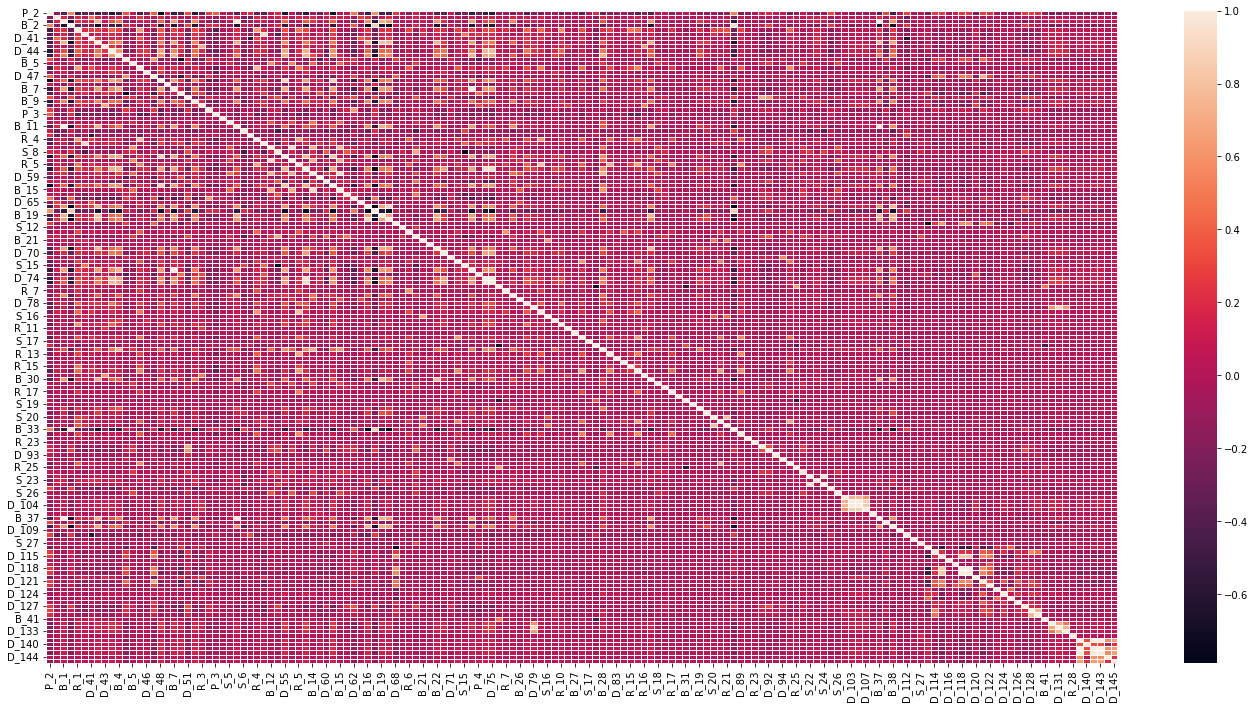

In [29]:
plt.figure(figsize = (24, 12))

corr = dff.drop(['target', 'Unnamed: 0'], axis=1).corr()
sns.heatmap(corr, annot = False, linewidths = 1)
plt.show()

In [30]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i]
            correlated_features.add(colname)


In [31]:
correlated_features

{'B_11',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_20',
 'B_22',
 'B_23',
 'B_28',
 'B_3',
 'B_30',
 'B_33',
 'B_37',
 'B_38',
 'B_8',
 'D_103',
 'D_104',
 'D_107',
 'D_113',
 'D_118',
 'D_119',
 'D_121',
 'D_129',
 'D_131',
 'D_133',
 'D_141',
 'D_143',
 'D_48',
 'D_55',
 'D_58',
 'D_61',
 'D_74',
 'D_75',
 'R_21',
 'R_4',
 'R_8',
 'S_15',
 'S_24',
 'S_7'}

In [32]:
type(correlated_features)

set

In [33]:
correlated_features.update(['Unnamed: 0'])
correlated_features

{'B_11',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_20',
 'B_22',
 'B_23',
 'B_28',
 'B_3',
 'B_30',
 'B_33',
 'B_37',
 'B_38',
 'B_8',
 'D_103',
 'D_104',
 'D_107',
 'D_113',
 'D_118',
 'D_119',
 'D_121',
 'D_129',
 'D_131',
 'D_133',
 'D_141',
 'D_143',
 'D_48',
 'D_55',
 'D_58',
 'D_61',
 'D_74',
 'D_75',
 'R_21',
 'R_4',
 'R_8',
 'S_15',
 'S_24',
 'S_7',
 'Unnamed: 0'}

Eliminamos las columnas que tengan una correlacion de Pearson mayor al 70% con otra columna

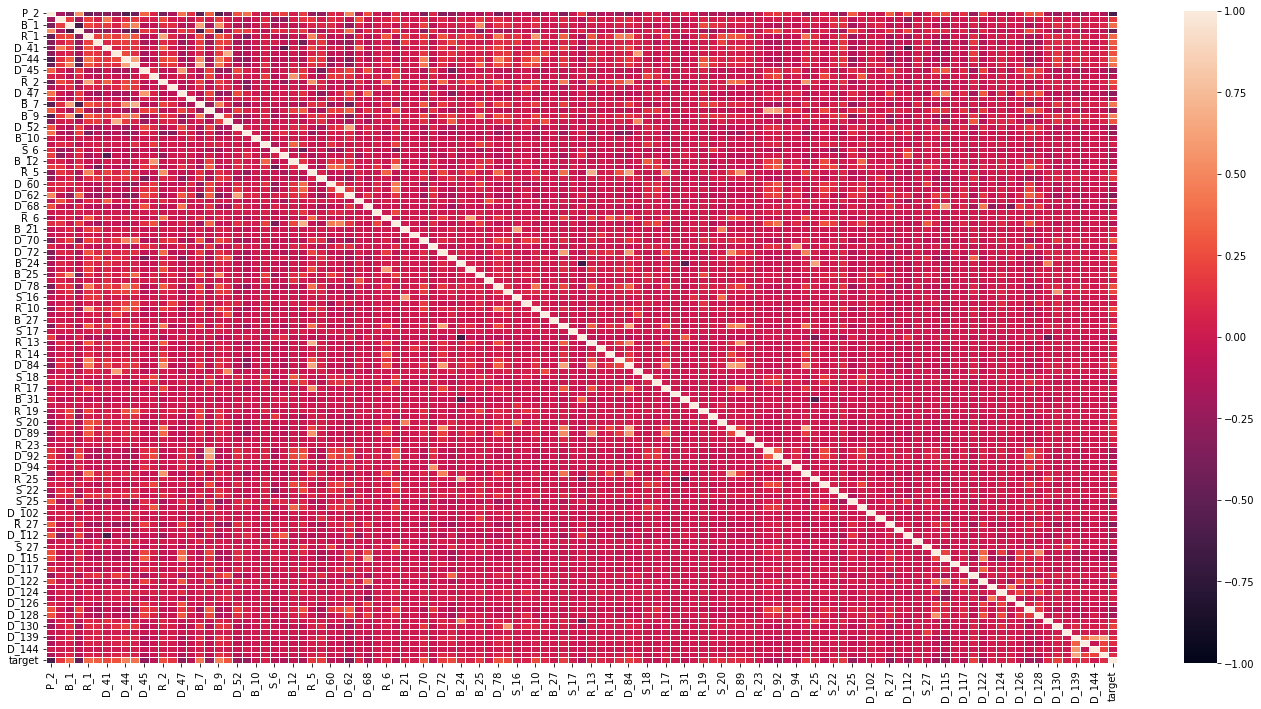

In [34]:
plt.figure(figsize = (24, 12))

corr = dff.drop(correlated_features, axis = 1).corr()
sns.heatmap(corr, annot = False, linewidths = 1, vmax=1, vmin= -1)
plt.show()

In [35]:
corr.columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'D_43', 'D_44',
       'B_4',
       ...
       'D_127', 'D_128', 'B_41', 'D_130', 'R_28', 'D_139', 'D_140', 'D_144',
       'D_145', 'target'],
      dtype='object', length=115)

In [36]:
corr.index

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'D_43', 'D_44',
       'B_4',
       ...
       'D_127', 'D_128', 'B_41', 'D_130', 'R_28', 'D_139', 'D_140', 'D_144',
       'D_145', 'target'],
      dtype='object', length=115)

In [37]:
# df_reducido = dff.loc[:,list(corr.columns) + cole]
df_reducido = dff.loc[:,list(corr.columns)]

In [38]:
df_reducido.shape

(276572, 115)

In [39]:
df_reducido.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Data columns (total 115 columns):
 #    Column  Non-Null Count   Dtype  
---   ------  --------------   -----  
 0    P_2     274277 non-null  float64
 1    D_39    276572 non-null  float64
 2    B_1     276572 non-null  float64
 3    B_2     276476 non-null  float64
 4    R_1     276572 non-null  float64
 5    S_3     225400 non-null  float64
 6    D_41    276476 non-null  float64
 7    D_43    193452 non-null  float64
 8    D_44    262857 non-null  float64
 9    B_4     276572 non-null  float64
 10   D_45    276476 non-null  float64
 11   B_5     276572 non-null  float64
 12   R_2     276572 non-null  float64
 13   D_46    215973 non-null  float64
 14   D_47    276572 non-null  float64
 15   B_6     276568 non-null  float64
 16   B_7     276572 non-null  float64
 17   D_51    276572 non-null  float64
 18   B_9     276572 non-null  float64
 19   R_3     276572 non-null  float64
 20   D_52    275080 non-null 

C:\Users\mlard\AppData\Local\Temp\ipykernel_7592\1208170624.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_reducido.info(verbose=True, null_counts=True)


In [40]:
df_reducido.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,D_43,D_44,B_4,...,D_127,D_128,B_41,D_130,R_28,D_139,D_140,D_144,D_145,target
count,274277.000000,2.765720e+05,276572.000000,2.764760e+05,2.765720e+05,225400.000000,2.764760e+05,193452.000000,2.628570e+05,2.765720e+05,...,2.765720e+05,2.714330e+05,2.765340e+05,2.714330e+05,2.765720e+05,2.714330e+05,2.745300e+05,2.745230e+05,2.714330e+05,276572.000000
mean,0.656094,1.534640e-01,0.124308,6.218612e-01,7.864847e-02,0.225812,5.941618e-02,0.153990,1.185817e-01,1.730830e-01,...,1.072242e-01,5.831390e-01,3.222594e-02,2.016633e-01,5.860529e-03,1.776248e-01,2.673155e-02,5.165175e-02,6.113005e-02,0.248923
std,0.244733,2.706362e-01,0.212576,4.013308e-01,2.255157e-01,0.192625,2.006907e-01,0.211072,2.204076e-01,2.227333e-01,...,3.029530e-01,4.933003e-01,2.191798e-01,3.974979e-01,2.953451e-02,3.779312e-01,1.458412e-01,1.806857e-01,1.905855e-01,0.432390
min,-0.440337,5.081586e-08,-0.529935,5.455276e-07,2.153178e-07,-0.443089,2.581347e-07,0.000003,2.222165e-09,2.042271e-07,...,6.665625e-09,9.328776e-09,2.735268e-08,8.005983e-08,4.699454e-09,2.547751e-08,2.158847e-08,1.969412e-08,1.295045e-08,0.000000
25%,0.479994,4.525406e-03,0.008890,1.062215e-01,2.899602e-03,0.127284,2.870306e-03,0.042251,3.829458e-03,2.766178e-02,...,2.780404e-03,5.956792e-03,2.547009e-03,3.124682e-03,2.494037e-03,3.035184e-03,2.562787e-03,2.748156e-03,3.029659e-03,0.000000
50%,0.694160,9.069601e-03,0.031279,8.143633e-01,5.781294e-03,0.163867,5.749618e-03,0.088102,7.670775e-03,8.243567e-02,...,5.574577e-03,1.000421e+00,5.101276e-03,6.216258e-03,5.005939e-03,6.034572e-03,5.112665e-03,5.501956e-03,6.047234e-03,0.000000
75%,0.864573,2.371768e-01,0.126282,1.002397e+00,8.655511e-03,0.258549,8.611234e-03,0.183644,1.320540e-01,2.391026e-01,...,8.362830e-03,1.004705e+00,7.657362e-03,9.323672e-03,7.504035e-03,9.075780e-03,7.657841e-03,8.259950e-03,9.063816e-03,0.000000
max,1.009999,5.362538e+00,1.324049,1.010000e+00,3.256284e+00,5.482888,6.315744e+00,7.548966,3.506895e+00,4.800353e+00,...,1.010000e+00,1.017865e+00,1.500785e+01,1.026128e+00,1.009961e+00,1.010000e+00,1.009999e+00,1.343272e+00,4.819670e+00,1.000000


In [41]:
#Las columnas categorias se encuentran en el kaggle de American Airlines
columnas_categoricas = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
columnas_cuantitativas = []
for columna in df_reducido.columns:
    if columna not in columnas_categoricas:
        columnas_cuantitativas.append(columna)
df_cuantitativas = df_reducido[columnas_cuantitativas].copy()
# df_categoricas = df_reducido[columnas_categoricas].copy()

In [42]:
df_cuantitativas.sample()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,D_43,D_44,B_4,...,D_127,D_128,B_41,D_130,R_28,D_139,D_140,D_144,D_145,target
49619,NaN,0.000144,0.006671,0.814122,0.009612,0.168519,0.002647,NaN,0.003645,0.006096,...,0.000914,NaN,0.007734,NaN,0.000206,NaN,NaN,NaN,NaN,0


In [43]:
df_cuantitativas.shape

(276572, 109)

Relleno los valores faltantes con la media

In [44]:
from sklearn.impute import SimpleImputer
columnas = df_cuantitativas.columns
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(df_cuantitativas)
df_sin_null = pd.DataFrame(imp.transform(df_cuantitativas), columns=columnas)

In [45]:
df_sin_null.isnull().sum().sort_values(ascending = False)/df.shape[0]

P_2       0.0
R_19      0.0
R_24      0.0
D_94      0.0
D_93      0.0
         ... 
D_65      0.0
D_62      0.0
S_11      0.0
D_60      0.0
target    0.0
Length: 109, dtype: float64

In [46]:
df_sin_null.sample()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,D_43,D_44,B_4,...,D_127,D_128,B_41,D_130,R_28,D_139,D_140,D_144,D_145,target
249421,0.458127,0.122256,0.033974,1.002874,0.003749,0.085201,0.005903,0.050767,0.003793,0.09203,...,0.001357,1.005604,0.002312,0.003851,0.008608,0.009046,0.00048,0.007271,0.009417,0.0


In [47]:
df_sin_null.shape

(276572, 109)

Eliminamos los outliers

In [48]:
# Eliminamos los outliers analizando los rangos intercuartiles
#Esta funcion no sirve. Elimina el 95% de los valores
def sacar_outliers(df):
    indices_outliers = list()
    for columna in df.columns:
        #Cuartiles
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        out_inf = (Q1 - 1.5 * IQR)
        out_sup = (Q3 + 1.5 * IQR)
    
        indice_outlier_inferior=df[df[columna]<out_inf].index.tolist()
        for indice in indice_outlier_inferior:
            indices_outliers.append(indice)
        
        indice_outlier_superior=df[df[columna]>out_sup].index.tolist()
        for indice in indice_outlier_superior:
            indices_outliers.append(indice)
    print('Indices con duplicado: ', len(indices_outliers))
    list_to_set = set(indices_outliers)
    indices_sin_duplicado = list(list_to_set)
    print('Indices sin duplicado: ', len(indices_sin_duplicado))

    for indice_outlier in indices_sin_duplicado:
        df_reducido.drop(indice_outlier, inplace=True)

In [49]:
# sacar_outliers(df_sin_null)
df_sin_null.shape

(276572, 109)

Hay que poner una Descripción de los datos como dice la consigna del tp

In [50]:
df_sin_null.to_csv("C:/Users/mlard/OneDrive/Escritorio/Mateo/Org de Datos/tp3Github/Org-Datos-Grupo-19/df_trabajo.csv" ,index=False)